In [1]:
## for loading, processing data & using for linear_algebra calculation
import numpy as np 
import pandas as pd 
import os
import openslide
import cv2
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

## print out the names of the first 5 image_files (total = 10 images for train_imgaes & train_label_masks) with the train, test, submission.csv files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:2]:
        print(os.path.join(dirname, filename))

/kaggle/input/prostate-cancer-grade-assessment/test.csv
/kaggle/input/prostate-cancer-grade-assessment/sample_submission.csv
/kaggle/input/prostate-cancer-grade-assessment/train.csv
/kaggle/input/prostate-cancer-grade-assessment/train_images/6d1a11077fe4183a4109d649cf319923.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_images/8809e1cb2640ba1c6ebf7fb3c72dc250.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_images/38b53a819b584debd748e16db8b2c488.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_label_masks/f0d3a67702abc214a7ca6c1158e5a62c_mask.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_label_masks/85b43e64b68fce39237fcfaf32d5a7d7_mask.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_label_masks/1975c20bde8ee4ef2fe32b7a3a7b3656_mask.tiff
/kaggle/input/h5files/img_dtb6.h5
/kaggle/input/h5files/img_dtb2.h5
/kaggle/input/h5files/img_dtb8.h5


In [2]:
BASE_PATH = '../input/prostate-cancer-grade-assessment'

# image and mask directories
data_dir = f'{BASE_PATH}/train_images'
mask_dir = f'{BASE_PATH}/train_label_masks'


# Location of training labels
train = pd.read_csv(f'{BASE_PATH}/train.csv').set_index('image_id')
test = pd.read_csv(f'{BASE_PATH}/test.csv')

train_labels = pd.read_csv('/kaggle/input/prostate-cancer-grade-assessment/train.csv').set_index('image_id')

submission = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

In [33]:
id_dir = [name.replace('_mask.tiff', '') for name in os.listdir(mask_dir)]
large_size = ['06f714d78f6f5c545cd149cf71c7c1c1',
 '192863a82b5a954ba0fa56b910574e1a',
 '1f368e9829e850bd6b6de7a521376720',
 '228e60ce9785add71bcd377e0c6fafa9',
 '28c34a837397ac08f276bfac99af6daf',
 '2b2101125ce01016af9496bed25908e1',
 '2b59dfa72ed1fbb3cc1dd6be9b16ae76',
 '2be84345474f8546c2607c6be750ab0e',
 '32993cdc127974fa9a42424bf060a203',
 '35a2ba270ef1fe91e4434cc83ccac50d',
 '372ea2dd928988579a7c716c1c36a9bd',
 '39b20d5c2588bafb42c5d6915de11b6b',
 '4010e2f5597c66cfedeff01bf890fac4',
 '44763cd60166db3c15077ca5ac0d1a28',
 '47043e84cc443828de9fbf077a936303',
 '4aaa6b030833ec19f2ccea7530fbfeb4',
 '5123de8a47c1584b66fea313adb4e2d3',
 '52bbaa0fbe4b7a3d193fc41eec5b0f46',
 '52f220bec1a2db42fee7a708e957d725',
 '53d99b6d0957c93029223458e5e9e5bc',
 '563d7dddd23d62e86b3d0e020b9e7c0a',
 '58381ead397bcae5aaf3572455872b3e',
 '5bad1f2f3c89c27ea00d2ed6bd8e2de1',
 '5ddb273c1966b8e5849a9292ed4c96ae',
 '5e4c64013fa5bc2c652e0bc5479be8c4',
 '5f204e4117e261c6bfb06626e5bb2410',
 '680984934a44ffcfc33f21b9b62f9436',
 '6e3b4eb31cb44f063fbfa2b7aa2d9861',
 '726027a4c8a859b5d38ab6f4d42b8dba',
 '7648ece616fd961c1447684b7dc0c654',
 '7ae637109d077936dbde6c77bd2c5eb7',
 '8017c7b5f7d8928a7465e6d41417c21a',
 '8369d7bac658189235a5d774d6ee5f71',
 '83f3b246bdbd51ed830877c3991bf7ca',
 '859651fe24367615a0f77ba556a196bb',
 '93c360d81e7e85d723da037885008528',
 '94f7f3918ecc4fd3ace3aa7d10e7d521',
 '9cd46c6f68b4c67c06e48fabf85a6a45',
 '9e72c86ff601172cb3900d6d57c0ad6c',
 'a027be54eb3b8529540d6b6c90f98a40',
 'a10eb69fb260132fde150bd76bd7b15c',
 'a37b456a2bc920630c60c2ff0c7d6325',
 'a6a7146bd23b394f54a5950d2dbefa7b',
 'a9602c1b9f465f9d3ca9f41084a6c64f',
 'ae2e55ae29c56bb4e122410aba1603e8',
 'af3c2515b4914a1dfb754d0442970144',
 'b20cf1d40c0f9925fcc8a04baaae451b',
 'b39123cbe4ae05cded37a1b02f815eb2',
 'b49d54b4f7e73808440c36fa240614c0',
 'b55955e9f9f6ff4787f5b78c18ae58db',
 'b96c4bb9689d3e5a6c6fc4e126f9f72f',
 'c2e76da97811429e9127de90ec307700',
 'c4aa6b337bd9348d6e5eb7e35418e491',
 'c77075a7f8ad3b3f413cee8b8df89203',
 'c79d24ced43aac04ce0531e229f62f03',
 'ceca3540b0d27bc1db9400138e1bf518',
 'cf335413f10f71bb6f69400ba4d5086c',
 'd2029423ffecf93f8114770e5d061027',
 'd8eb251809fb58ce9497165de727591e',
 'ddcb50ebc2fad73f053d0a3b44c30882',
 'ddef4e1c6a194049fc45361836134ae7',
 'e3a26222873878047740a3d40ce041ee',
 'e8d76da2d567c88a5f7ea429e58b74f1',
 'eac2bfcf6b1dd7733ab9e2f31452e5bd',
 'ee6c3d7dad8ab343b9db6ca62fe4904f',
 'f584978dc639c48313cbc8b991c769ad',
 'f6dc7b75bcaed70894cf4b1aa4c9e874',
 'f948e5f2b0a49af2c0a7f3f74093262e',
 'fa076b1f64d37f778abe57e454a83b75',
 'fe060ad89a138fa24eed135c4b46954c',
 '3790f55cad63053e956fb73027179707']
id_dir = set(id_dir) - set(large_size)
id_dir = list(id_dir)
id_dir.sort()
len(id_dir)

10445

In [4]:
import time
def image_analyze(ID_list, level = 2):
    times = []
    memories = []
    for ID in ID_list:
        t0 = time.time()
        image = skimage.io.MultiImage(os.path.join(data_dir, f'{ID}.tiff'))[level]
        times.append(time.time() - t0)
        memories.append(image.nbytes / (2**20))
        del image
    return pd.DataFrame({'image_id': ID_list, 'times': times, 'memories(Mb)': memories})

%time ana_df = image_analyze(id_dir, 2)
ana_df.describe()

CPU times: user 3min 51s, sys: 30.4 s, total: 4min 21s
Wall time: 5min 20s


,times,memories(Mb)
count,10515.000000,10515.000000
mean,0.030448,5.207889
std,0.010623,4.023265
min,0.007740,0.032959
25%,0.022457,1.853027
50%,0.029881,4.245117
75%,0.037165,8.085938
max,0.140916,60.187500


In [12]:
#ana_df.set_index('image_id')
ana_df.head()

,image_id,times,memories(Mb)
0,0005f7aaab2800f6170c399693a96917,0.106014,9.096680
1,000920ad0b612851f8e01bcc880d9b3d,0.027670,2.285156
2,0018ae58b01bdadc8e347995b69f99aa,0.017615,1.667725
3,001c62abd11fa4b57bf7a6c603a11bb9,0.027187,7.655394
4,001d865e65ef5d2579c190a0e0350d8f,0.057762,11.074219


In [16]:
ana_df.max()

image_id        ffe9bcababc858e04840669e788065a1
times                                   0.140916
memories(Mb)                             60.1875
dtype: object

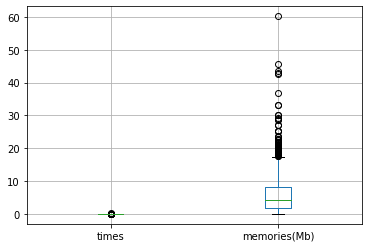

In [20]:
ana_df.boxplot()

In [34]:
large_size_df = ana_df[ana_df['memories(Mb)'] > 18]
print(len(large_size_df))
large_size_df

(70,
                                image_id     times  memories(Mb)
 259    06f714d78f6f5c545cd149cf71c7c1c1  0.063396     22.030249
 972    192863a82b5a954ba0fa56b910574e1a  0.083880     23.408203
 1216   1f368e9829e850bd6b6de7a521376720  0.080863     23.583984
 1342   228e60ce9785add71bcd377e0c6fafa9  0.068629     22.681641
 1590   28c34a837397ac08f276bfac99af6daf  0.096329     25.125000
 ...                                 ...       ...           ...
 10053  f584978dc639c48313cbc8b991c769ad  0.063484     21.140625
 10106  f6dc7b75bcaed70894cf4b1aa4c9e874  0.056851     20.270508
 10217  f948e5f2b0a49af2c0a7f3f74093262e  0.107342     60.187500
 10245  fa076b1f64d37f778abe57e454a83b75  0.076923     25.224609
 10424  fe060ad89a138fa24eed135c4b46954c  0.065651     19.218750
 
 [70 rows x 3 columns])

In [29]:
large_size_df['image_id'].tolist()

['06f714d78f6f5c545cd149cf71c7c1c1',
 '192863a82b5a954ba0fa56b910574e1a',
 '1f368e9829e850bd6b6de7a521376720',
 '228e60ce9785add71bcd377e0c6fafa9',
 '28c34a837397ac08f276bfac99af6daf',
 '2b2101125ce01016af9496bed25908e1',
 '2b59dfa72ed1fbb3cc1dd6be9b16ae76',
 '2be84345474f8546c2607c6be750ab0e',
 '32993cdc127974fa9a42424bf060a203',
 '35a2ba270ef1fe91e4434cc83ccac50d',
 '372ea2dd928988579a7c716c1c36a9bd',
 '39b20d5c2588bafb42c5d6915de11b6b',
 '4010e2f5597c66cfedeff01bf890fac4',
 '44763cd60166db3c15077ca5ac0d1a28',
 '47043e84cc443828de9fbf077a936303',
 '4aaa6b030833ec19f2ccea7530fbfeb4',
 '5123de8a47c1584b66fea313adb4e2d3',
 '52bbaa0fbe4b7a3d193fc41eec5b0f46',
 '52f220bec1a2db42fee7a708e957d725',
 '53d99b6d0957c93029223458e5e9e5bc',
 '563d7dddd23d62e86b3d0e020b9e7c0a',
 '58381ead397bcae5aaf3572455872b3e',
 '5bad1f2f3c89c27ea00d2ed6bd8e2de1',
 '5ddb273c1966b8e5849a9292ed4c96ae',
 '5e4c64013fa5bc2c652e0bc5479be8c4',
 '5f204e4117e261c6bfb06626e5bb2410',
 '680984934a44ffcfc33f21b9b62f9436',
 

In [19]:
from torch.utils.data import Dataset, DataLoader
import torch

class PANDADataset(Dataset):
    def __init__(self, df, level = 1, transform=None):
        self.df = df
        self.level = level
        self.transform = transform

    def __len__(self):
        return len(self.df)
    def __getitem__(self, index, level = 1):
        ID = self.df[index][0]
        coordinate = self.df[index][1: ]
        image, mask = load_data_and_mask(ID, coordinate, level)
        
        return torch.tensor(image).permute(2, 0, 1), torch.tensor(mask).permute(2, 0, 1)[0]
    